# ARIMA FORECASTING

In [1]:
# Resource: https://github.com/Sangarshanan/time-series-forecasting/blob/master/ARIMA.ipynb
# https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06

import pandas as pd
from pandas import read_csv
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf

In [2]:


# load dataset
def parser(x):
    # print(x)
	return datetime.strptime(x, "%d/%m/%Y")
# series = read_csv('./input/McDonald_Test.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

# series.index = series.index.to_period('M')


# dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y')
data = pd.read_csv('./input/McDonald_Test.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# data.index = data.index.to_period('D')
data.head()

Date
2005-03-31    4.803
2005-06-30    5.096
2005-09-30    5.327
2005-12-31    5.235
2006-03-31    4.914
Name: Revenue($), dtype: float64

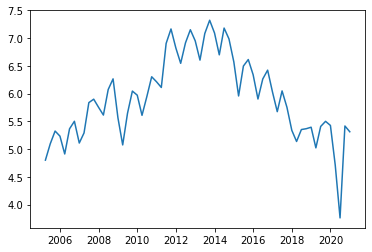

In [3]:
plt.plot(data)
plt.show()

In [4]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

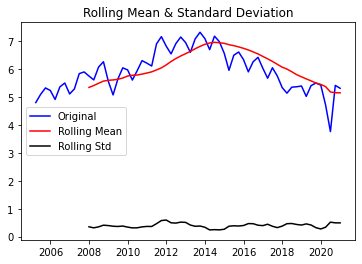

In [28]:
test_stationarity(data)

In [5]:
def difference(dataset, interval=1):
    index = list(dataset.index)
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return (diff)


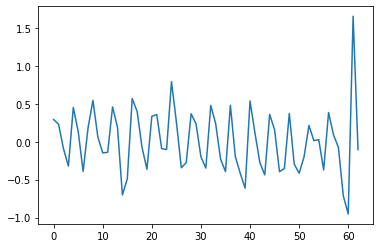

In [6]:
# Now that we have AR term lets calculate the differencing term
diff = difference(data)
plt.plot(diff)
plt.show()



### so we have to apply transformation which penalize higher values more than smaller values.

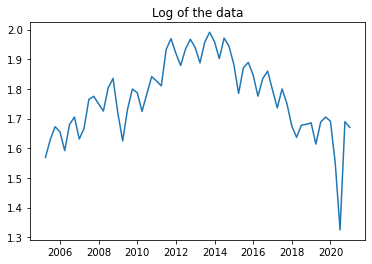

In [7]:
ts_log = np.log(data)
plt.title('Log of the data')
plt.plot(ts_log)
plt.show()

## Moving average

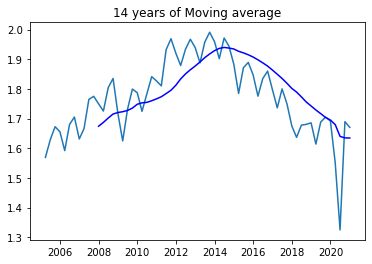

In [8]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.title('14 years of Moving average')
plt.plot(moving_avg, color='blue')
plt.show()

In [9]:

ts_log_moving_avg_diff = ts_log - moving_avg

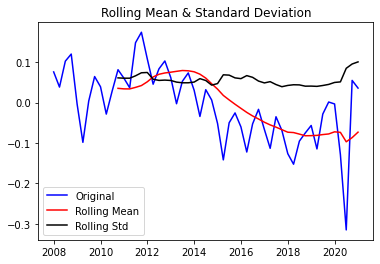

In [10]:
# since we are taking average of last 12 values, rolling mean is not defined for first 11 values. So we remove the NAN values
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

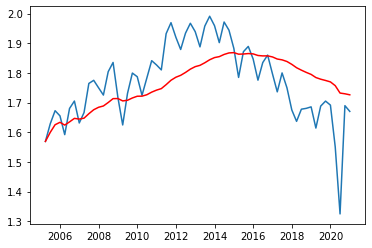

In [11]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
#parameter halflife is used to define the amount of exponential decay
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.show()

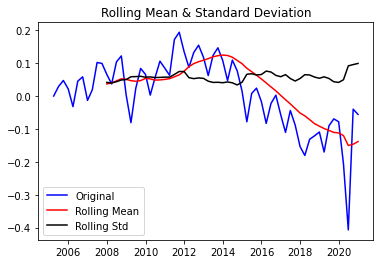

In [12]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

### Eliminating Trend and Seasonality

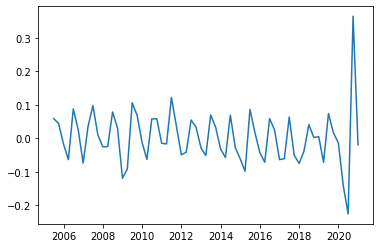

In [13]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

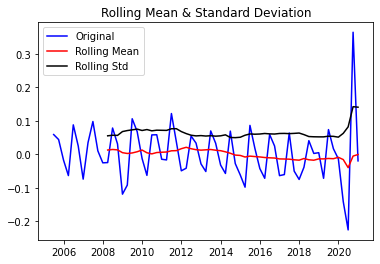

In [14]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Decomposition

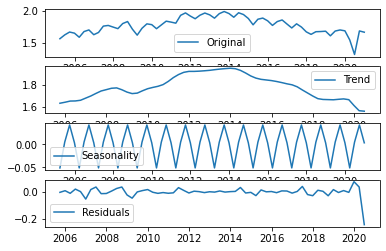

<Figure size 432x288 with 0 Axes>

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()
plt.tight_layout()

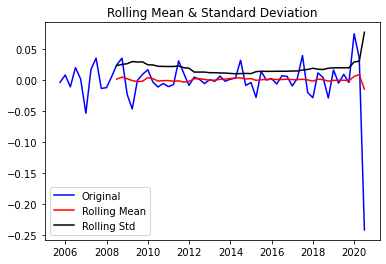

In [16]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


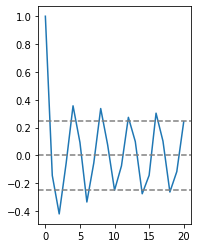

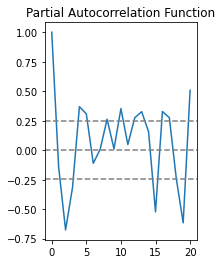

<Figure size 432x288 with 0 Axes>

In [75]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.show()
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()
plt.tight_layout()

## AR model¶

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


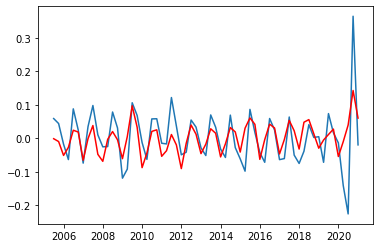

In [17]:

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(2, 1, 0), freq=ts_log.index.inferred_freq)  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.show()

## MA model

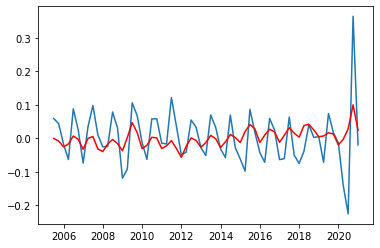

In [18]:
model = ARIMA(ts_log, order=(0, 1, 2), freq=ts_log.index.inferred_freq)  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.show()

## ARIMA

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

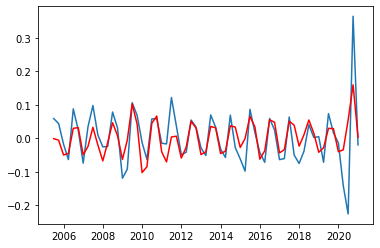

In [23]:
model = ARIMA(ts_log, order=(2, 1, 2), freq=ts_log.index.inferred_freq)  
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()

In [35]:
from statsmodels.tsa.stattools import adfuller


# load dataset
def parser2(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('input/shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser2)

import numpy as np
# Tính chuỗi return

# r_t = np.log(series[0]/series[1]).values[:, 0]

# mean = np.nanmean(r_t)
# r_t[0]=mean
# r_t[:5]

# result = adfuller(series)
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
# 	print('\t%s: %.3f' % (key, value))

AttributeError: 'numpy.float64' object has no attribute 'values'